In [1]:
#Question no .2
#Mriganko Roy
#20A2HP415

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mrigankoml/MLAP_Term-IV/main/MLAP2021Exam-main/MALP2021%20Question%20paper/HR_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [7]:
df.drop('Department',axis=1,inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encode = LabelEncoder()
encoded_salary = encode.fit_transform(df.iloc[:,-1])
print(encoded_salary)

[1 2 2 ... 1 1 1]


In [11]:
df['salary'] = encoded_salary
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1
5,0.41,0.50,2,153,3,0,1,0,1
6,0.10,0.77,6,247,4,0,1,0,1
7,0.92,0.85,5,259,5,0,1,0,1
8,0.89,1.00,5,224,5,0,1,0,1
9,0.42,0.53,2,142,3,0,1,0,1


In [12]:
X_features = list( df.columns )
X_features.remove( 'left')

In [13]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'salary']

In [14]:
encoded_hr = pd.get_dummies(df[X_features], drop_first=False)

In [15]:
encoded_hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,2
2,0.11,0.88,7,272,4,0,0,2
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1
5,0.41,0.50,2,153,3,0,0,1
6,0.10,0.77,6,247,4,0,0,1
7,0.92,0.85,5,259,5,0,0,1
8,0.89,1.00,5,224,5,0,0,1
9,0.42,0.53,2,142,3,0,0,1


In [16]:
import statsmodels.api as sm
Y = df.left
X = encoded_hr 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.2,
random_state = 42)

In [18]:
X_test.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
6723,0.65,0.96,5,226,2,1,0,2
6473,0.88,0.80,3,166,2,0,0,1
4679,0.69,0.98,3,214,2,0,0,1
862,0.41,0.47,2,154,3,0,0,1
7286,0.87,0.76,5,254,2,1,0,1
8127,0.72,0.88,3,224,3,0,0,1
3017,0.98,0.78,4,155,3,1,0,1
3087,0.17,0.76,4,280,5,0,0,1
6425,0.20,0.98,4,166,4,1,0,2
2250,0.16,0.90,5,258,3,0,0,2


In [19]:
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.442981
         Iterations 7


In [20]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  0.194     
Dependent Variable:    left              AIC:               10646.6526
Date:                  2021-10-19 12:40  BIC:               10705.7933
No. Observations:      11999             Log-Likelihood:    -5315.3   
Df Model:              7                 LL-Null:           -6595.3   
Df Residuals:          11991             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        7.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
satisfaction_level    -4.1410   0.1016 -40.7379 0.0000 -4.3402 -3.9417
last_evaluation        0.7561   0.1539   4.9116 0.0000  0.4544  1.0578
number_project        -0.3015   0.0233 -12.9258 0.0000 -0.3472 -0.2557
average_montly_hours   0.0050   0.0005   9.3525 0.0000  0.0040  0.0060
time_spend_company     0.2291   0.0160  14.3468 0.0000  0.1978  0.2604
Work_accident         -1.4700   0.0985 -14.9215 0.0000 -1.6631 -1.2769
promotion_last_5years -1.7812   0.2783  -6.3998 0.0000 -2.3267 -1.2357
salary                 0.0499   0.0365   1.3649 0.1723 -0.0217  0.1215
======================================================================

"""

In [21]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [ ]:

significant_vars = get_significant_vars( logit_model )
significant_vars

In [23]:
final_logit = sm.Logit( y_train,
( X_train[significant_vars] ) )
logit_model2 = final_logit.fit()

Optimization terminated successfully.
         Current function value: 0.443059
         Iterations 7


In [24]:
logit_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  0.194     
Dependent Variable:    left              AIC:               10646.5188
Date:                  2021-10-19 12:40  BIC:               10698.2668
No. Observations:      11999             Log-Likelihood:    -5316.3   
Df Model:              6                 LL-Null:           -6595.3   
Df Residuals:          11992             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        7.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
satisfaction_level    -4.1183   0.1002 -41.1139 0.0000 -4.3146 -3.9220
last_evaluation        0.7837   0.1526   5.1357 0.0000  0.4846  1.0828
number_project        -0.2999   0.0233 -12.8737 0.0000 -0.3456 -0.2543
average_montly_hours   0.0051   0.0005   9.6256 0.0000  0.0041  0.0061
time_spend_company     0.2313   0.0159  14.5648 0.0000  0.2002  0.2624
Work_accident         -1.4685   0.0985 -14.9049 0.0000 -1.6616 -1.2754
promotion_last_5years -1.7883   0.2787  -6.4163 0.0000 -2.3346 -1.2421
======================================================================

"""

In [25]:
y_pred_df = pd.DataFrame( { "actual": y_test,
"predicted_prob": logit_model.predict(( X_test ) ) } )

In [26]:
y_pred_df.sample(15, random_state = 42)

,actual,predicted_prob
12673,1,0.424255
7937,0,0.126797
4787,0,0.059790
14427,1,0.449223
13423,0,0.064530
181,1,0.675476
4513,0,0.638149
4010,0,0.261071
12153,1,0.412364
5595,0,0.035174


In [27]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.3 else 0)

In [28]:
y_pred_df.head(20)

,actual,predicted_prob,predicted
6723,0,0.037132,0
6473,0,0.068772,0
4679,0,0.191099,0
862,1,0.392119,1
7286,0,0.014378,0
8127,0,0.203647,0
3017,0,0.009638,0
3087,0,0.778991,1
6425,0,0.285527,0
2250,0,0.642754,1


In [29]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [30]:
def draw_cm( actual, predicted ):
## Cret
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f'
                 )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

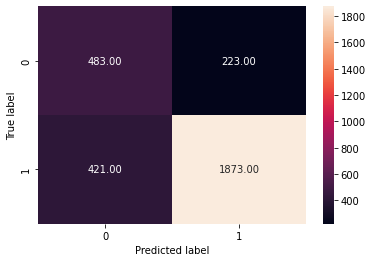

In [31]:
draw_cm( y_pred_df.actual,
y_pred_df.predicted )

In [33]:
print( metrics.classification_report( y_pred_df.actual,
y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2294
           1       0.53      0.68      0.60       706

    accuracy                           0.79      3000
   macro avg       0.71      0.75      0.73      3000
weighted avg       0.81      0.79      0.79      3000

